In [ ]:
from google.colab import auth
from google.auth import default
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1DrzAzEGT70O45KKXulY6DwGdorkiAFfjb6MCnyNsnAg/edit").worksheet("Form Responses 1")

# Convert to pandas DataFrame
data = sheet.get_all_records()
df = pd.DataFrame(data)

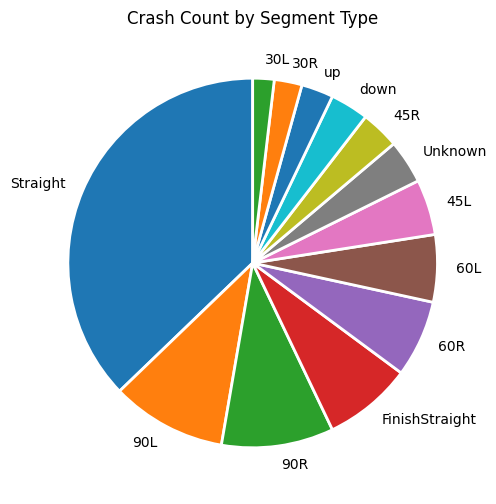

,count
segmentType,
Straight,398
90L,108
90R,105
FinishStraight,83
60R,72
60L,63
45L,52
Unknown,41
45R,36


In [ ]:
#Crash count by segment type
segment_counts = df['segmentType'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index,
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Crash Count by Segment Type')
plt.show()

segment_counts

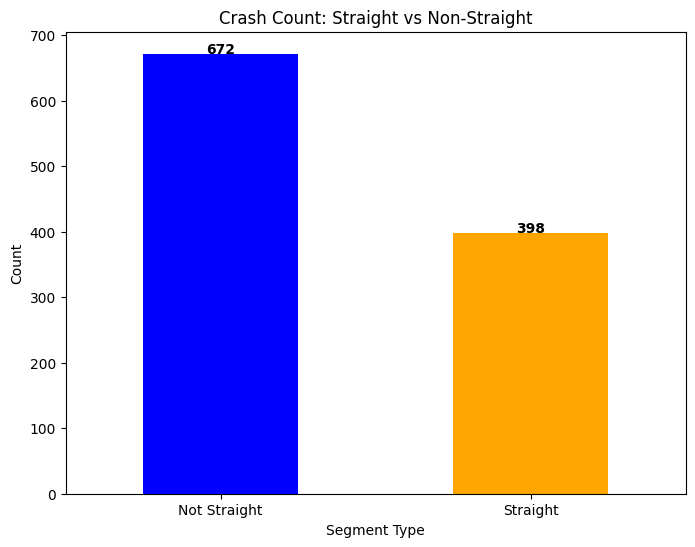

In [ ]:
#crash count by Straight vs non straight

df['segment_category'] = df['segmentType'].apply(lambda x: 'Straight' if x == 'Straight' else 'Not Straight')

segment_counts = df['segment_category'].value_counts()

plt.figure(figsize=(8, 6))
ax = segment_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Crash Count: Straight vs Non-Straight')
plt.xlabel('Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

for i, v in enumerate(segment_counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()